# Problema a ser solucionado:
Digamos que estou estagiando em uma corretora e o analista relata que existe um potencial cliente que deseja investir seu capital em uma ação do setor financeiro. Para isso, ele delega as seguintes tarefas no intuíto de facilitar sua decisão de qual seria o melhor investimento: (i) utilizar uma base de dados das cotações históricas de todos os bancos listados na B3 a partir de 2019; (ii) calcular os retornos dos ativos; (iii) calcular os retornos acumulados; (iv) calcular a média dos retornos; (v) calcular a volatilidade dos retornos e (vi) calcular a volatilidade mensal dos ativos.


### Importando biblioteca

In [1]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import plotly.express as px

### Criando a lista dos tickers

In [2]:
lista = []

while True:
    codigo = input('Digite o código da ação (código.SA), para sair digite "sair": ')
    if codigo != 'sair':
        lista.append(codigo)
    else:
        pass
    
    if codigo == 'sair':
        break
    
print(lista)


Digite o código da ação (código.SA), para sair digite "sair": BPAC11.SA
Digite o código da ação (código.SA), para sair digite "sair": SANB11.SA
Digite o código da ação (código.SA), para sair digite "sair": BPAN4.SA
Digite o código da ação (código.SA), para sair digite "sair": BBDC4.SA
Digite o código da ação (código.SA), para sair digite "sair": ITUB4.SA
Digite o código da ação (código.SA), para sair digite "sair": BBAS3.SA
Digite o código da ação (código.SA), para sair digite "sair": BIDI11.SA
Digite o código da ação (código.SA), para sair digite "sair": sair
['BPAC11.SA', 'SANB11.SA', 'BPAN4.SA', 'BBDC4.SA', 'ITUB4.SA', 'BBAS3.SA', 'BIDI11.SA']


### Extraindo a base de dados

In [3]:
data_inicio = input('Digite uma data inicial a partir de 2015 (ano-mes-dia): ')
data_final = input('Digite uma data final (ano-mes-dia): ')
def extracao(codigos):
    dataset = pd.DataFrame()
    for i in codigos:
        dataset[i] = data.DataReader(name = i, data_source = 'yahoo', 
                                        start = data_inicio, end = data_final)['Adj Close']
    
    return dataset
        
cotacao_df = extracao(lista)
display(cotacao_df.head())


Digite uma data inicial a partir de 2015 (ano-mes-dia): 2019-01-01
Digite uma data final (ano-mes-dia): 2022-01-01


,BPAC11.SA,SANB11.SA,BPAN4.SA,BBDC4.SA,ITUB4.SA,BBAS3.SA,BIDI11.SA
Date,,,,,,,
2019-01-02,5.773697,36.453148,1.858408,21.647640,32.984241,39.501389,NaN
2019-01-03,6.012529,37.656548,1.802655,21.866938,33.528053,39.663952,NaN
2019-01-04,6.225854,37.616703,1.830531,21.695353,32.966412,39.663952,NaN
2019-01-07,6.353385,38.246304,1.811947,21.952728,33.028805,39.403847,NaN
2019-01-08,6.235073,37.964569,1.811947,22.086794,33.447800,38.956825,NaN


### Verificando se há valores nulos

In [4]:
display(cotacao_df.isnull().sum())


BPAC11.SA      0
SANB11.SA      0
BPAN4.SA       0
BBDC4.SA       0
ITUB4.SA       0
BBAS3.SA       0
BIDI11.SA    139
dtype: int64

### Apagando valores nulos

In [5]:
cotacao_df.dropna(inplace=True)
display(cotacao_df)


,BPAC11.SA,SANB11.SA,BPAN4.SA,BBDC4.SA,ITUB4.SA,BBAS3.SA,BIDI11.SA
Date,,,,,,,
2019-07-19,13.612015,38.653912,9.350433,24.388218,33.458046,43.873901,14.064091
2019-07-22,13.405052,38.662197,9.161917,24.725496,34.027935,43.882332,14.232108
2019-07-23,13.319412,38.463379,9.067657,24.809824,34.358826,43.367664,14.034440
2019-07-24,13.238529,38.049168,9.086512,25.276831,34.331264,44.152328,14.110213
2019-07-25,13.060114,37.278748,8.954549,23.804461,33.274208,42.287689,14.001496
...,...,...,...,...,...,...,...
2021-12-17,22.412270,30.288731,10.295449,17.697901,21.346355,29.434074,30.379999
2021-12-20,21.452875,29.289989,10.021425,17.331799,21.017950,28.550955,28.799999
2021-12-21,21.242327,29.289989,9.933346,17.257563,21.047804,28.628592,28.000000


### Salvando a base de dados

In [6]:
nome_arquivo = input('Digite o nome do arquivo (nome.csv): ')
cotacao_df.to_csv(nome_arquivo)


Digite o nome do arquivo (nome.csv): bancos.csv


### Abrindo a base de dados

In [7]:
cotacao_df = pd.read_csv(nome_arquivo)
display(cotacao_df.head())


,Date,BPAC11.SA,SANB11.SA,BPAN4.SA,BBDC4.SA,ITUB4.SA,BBAS3.SA,BIDI11.SA
0,2019-07-19,13.612015,38.653912,9.350433,24.388218,33.458046,43.873901,14.064091
1,2019-07-22,13.405052,38.662197,9.161917,24.725496,34.027935,43.882332,14.232108
2,2019-07-23,13.319412,38.463379,9.067657,24.809824,34.358826,43.367664,14.034440
3,2019-07-24,13.238529,38.049168,9.086512,25.276831,34.331264,44.152328,14.110213
4,2019-07-25,13.060114,37.278748,8.954549,23.804461,33.274208,42.287689,14.001496


### Criando um dataframe com os retornos

In [8]:
def retorno(dataset):
    dataset = dataset.copy()
    for i in dataset.columns[1:]:
        dataset[i] = (dataset[i] / dataset[i].shift(1)) - 1
        
    return dataset

retorno_df = retorno(cotacao_df)
display(retorno_df.head())


,Date,BPAC11.SA,SANB11.SA,BPAN4.SA,BBDC4.SA,ITUB4.SA,BBAS3.SA,BIDI11.SA
0,2019-07-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-07-22,-0.015204,0.000214,-0.020161,0.013830,0.017033,0.000192,0.011947
2,2019-07-23,-0.006389,-0.005142,-0.010288,0.003411,0.009724,-0.011728,-0.013889
3,2019-07-24,-0.006073,-0.010769,0.002079,0.018823,-0.000802,0.018093,0.005399
4,2019-07-25,-0.013477,-0.020248,-0.014523,-0.058250,-0.030790,-0.042232,-0.007705


### Criando um dataframe com os retornos acumulados

In [9]:
def acumulado(dataset):
    dataset = dataset.copy()
    
    for i in dataset.columns[1:]:
        dataset[i] = (dataset[i] / dataset[i][0]) - 1
        
    return dataset

acumulado_df = acumulado(cotacao_df)
display(acumulado_df.head())


,Date,BPAC11.SA,SANB11.SA,BPAN4.SA,BBDC4.SA,ITUB4.SA,BBAS3.SA,BIDI11.SA
0,2019-07-19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2019-07-22,-0.015204,0.000214,-0.020161,0.013830,0.017033,0.000192,0.011947
2,2019-07-23,-0.021496,-0.004929,-0.030242,0.017287,0.026923,-0.011538,-0.002108
3,2019-07-24,-0.027438,-0.015645,-0.028226,0.036436,0.026099,0.006346,0.003279
4,2019-07-25,-0.040545,-0.035576,-0.042339,-0.023936,-0.005495,-0.036154,-0.004451


### Criando um dataframe da volatilidade dos ultimos 21 pregões (aproximadamente mensal)

In [10]:
def vol21(dataset):
    dataset1 = dataset.copy()
    
    for acao in dataset1.columns[1:]:
        for i in range(0, len(dataset1)):
            if i <= 20:
                dataset1.loc[i, acao] = 0
            else:
                dataset1.loc[i, acao] = dataset.loc[i - 20: i, acao].std()
    
    return dataset1

volatilidade_df = vol21(retorno_df)
display(volatilidade_df.tail())


,Date,BPAC11.SA,SANB11.SA,BPAN4.SA,BBDC4.SA,ITUB4.SA,BBAS3.SA,BIDI11.SA
599,2021-12-17,0.030938,0.017833,0.064051,0.020884,0.016807,0.023551,0.061225
600,2021-12-20,0.032609,0.018928,0.064098,0.021300,0.017018,0.024631,0.060828
601,2021-12-21,0.030692,0.018962,0.063450,0.021042,0.017006,0.024574,0.056232
602,2021-12-22,0.030812,0.018789,0.066008,0.020544,0.016525,0.022873,0.055759
603,2021-12-23,0.030709,0.018035,0.065071,0.019557,0.015239,0.022481,0.052240


### Calculando a média dos retornos diários dos ativos

In [11]:
def media(dataset):
    media = []
    
    for i in dataset.columns[1:]:
        media.append(round(dataset[i].mean() * 100, 2))
        
    return media

lista_media = media(retorno_df)
print(lista_media)


[0.15, -0.01, 0.14, -0.02, -0.04, -0.03, 0.23]


### Calculando a volatilidade dos retornos diários dos ativos

In [12]:
def volatilidade(dataset):
    vol = []
    
    for i in dataset.columns[1:]:
        vol.append(round(dataset[i].std() * 100, 4))
        
    return vol

lista_vol = volatilidade(retorno_df)
print(lista_vol)


[3.8861, 2.6909, 4.7632, 2.7415, 2.4959, 2.9215, 4.6664]


### Visualizando os retornos médios dos ativos

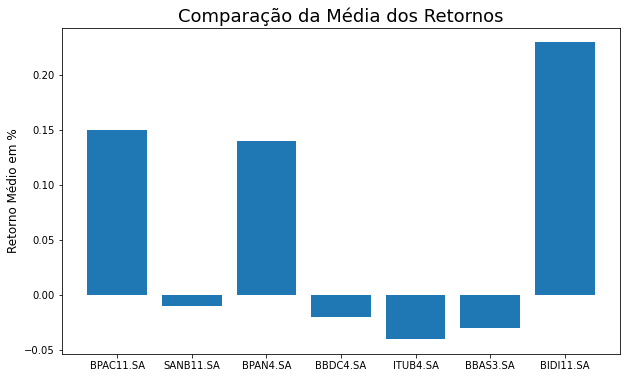

In [13]:
plt.subplots(figsize = (10,6))
plt.bar(lista, lista_media)
plt.ylabel('Retorno Médio em %', fontsize = 12)
plt.title('Comparação da Média dos Retornos', fontsize = 18)
plt.show()


### Visualizando a volatilidade dos ativos

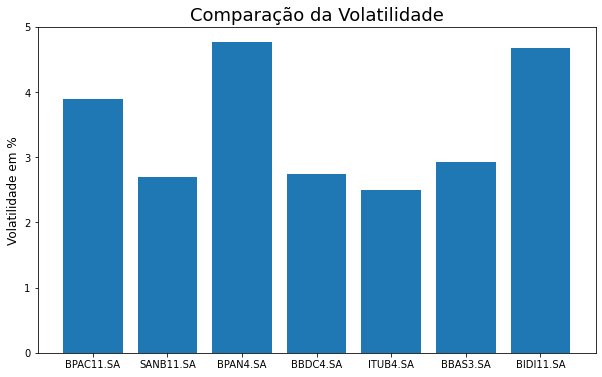

In [14]:
plt.subplots(figsize = (10,6))
plt.bar(lista, lista_vol)
plt.ylabel('Volatilidade em %', fontsize = 12)
plt.title('Comparação da Volatilidade', fontsize = 18)
plt.show()


### Visualizando qual teve a melhor rentabilidade

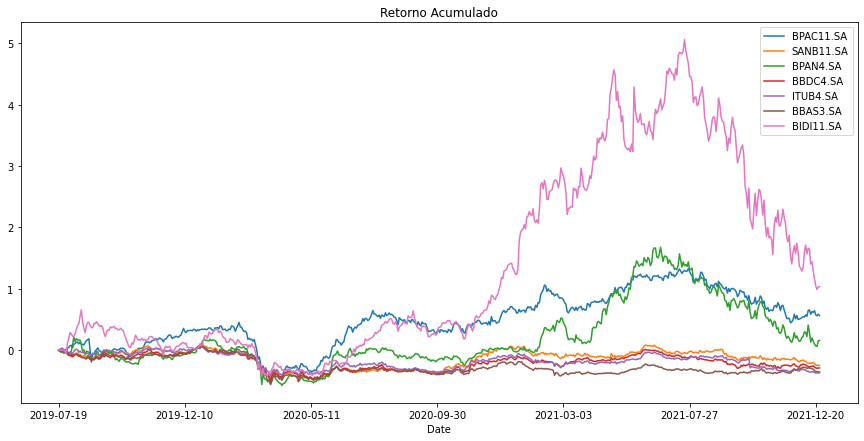

In [15]:
acumulado_df.plot(x = 'Date', figsize = (15,7), title = 'Retorno Acumulado')
plt.show()


### Visualizando qual teve o maior risco ao longo do tempo em um prazo de 21 dias

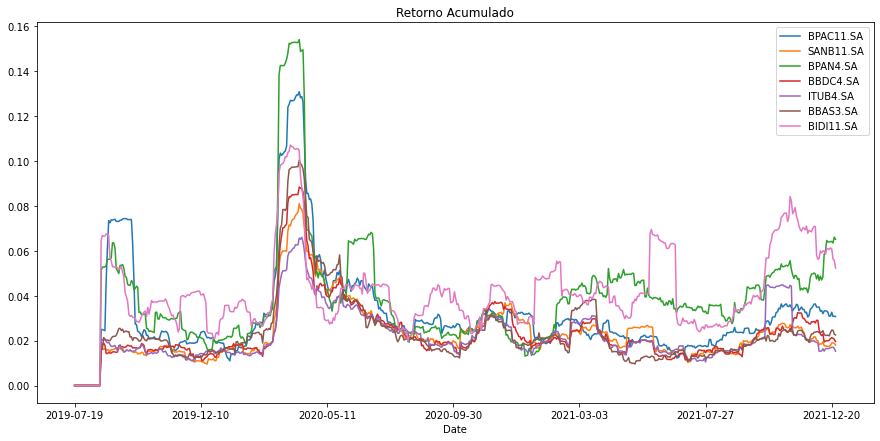

In [16]:
volatilidade_df.plot(x = 'Date', figsize = (15,7), title = 'Retorno Acumulado')
plt.show()
